In [1]:
from sklearn import model_selection
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline
from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import seaborn as sns
import json
import time

# Ouverture du fichier dans un dataframe

In [4]:
df = pd.read_csv("C:/Users/hp/Downloads/data2.csv")
print ("Nombre de Lignes et de colonnes ",df.shape)

Nombre de Lignes et de colonnes  (20000, 13)


In [5]:
df.head(10)

,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,M,licence,forage,63.86,non,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0
3,3,3,2011-07-01,brun,NaN,12.0,32442.0,M,licence,geologie,45.09,non,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,F,licence,detective,81.91,non,0
5,5,5,2014-02-12,chatain,37.0,8.0,38558.0,M,master,geologie,63.46,non,1
6,6,6,2013-11-11,brun,33.0,12.0,39476.0,M,master,geologie,50.20,oui,0
7,7,7,2012-03-10,roux,31.0,10.0,42392.0,M,licence,forage,62.20,oui,0
8,8,8,2014-10-17,chatain,43.0,10.0,28625.0,M,doctorat,geologie,65.17,non,1
9,9,9,2011-06-04,chatain,28.0,11.0,32454.0,M,master,forage,66.93,non,1


# Bar chart des embauches

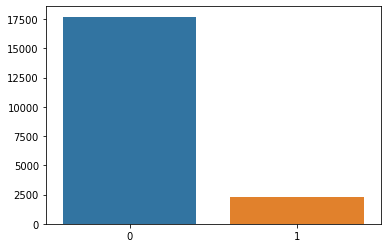

In [6]:
y = df["embauche"].value_counts()
sns.barplot(y.index, y.values)

# Rejet de lignes avec des cellules vides

In [8]:
df.dropna(inplace=True)

# Recherche de valeurs incohérentes 

In [9]:
df.describe()

,Unnamed: 0,index,age,exp,salaire,note,embauche
count,19021.000000,19021.000000,19021.000000,19021.000000,19021.000000,19021.000000,19021.000000
mean,9993.008990,9993.008990,34.998791,9.496662,34966.878713,75.184446,0.114558
std,5771.344205,5771.344205,9.606263,3.012915,5005.208499,17.112102,0.318496
min,0.000000,0.000000,-3.000000,-2.000000,14128.000000,8.680000,0.000000
25%,4986.000000,4986.000000,29.000000,7.000000,31593.000000,63.730000,0.000000
50%,9989.000000,9989.000000,35.000000,9.000000,34968.000000,75.110000,0.000000
75%,14993.000000,14993.000000,41.000000,12.000000,38353.000000,86.670000,0.000000
max,19999.000000,19999.000000,72.000000,23.000000,53977.000000,143.220000,1.000000


# Rejet de lignes avec des valeurs incohérentes 

In [10]:
print ("Rejet des lignes comportant des valeur incohérentes")
df = df[df.age > 0]
df = df[df.exp > 0]

Rejet des lignes comportant des valeur incohérentes


# Transformation des variables catégorielles en boolean

In [11]:
# Discreet value integer encoder
label_encoder = preprocessing.LabelEncoder()
# sexe, diplome, specialité and dispo are strings and we want discreet integer values
df['sexe'] = label_encoder.fit_transform(df['sexe'])
df['diplome'] = label_encoder.fit_transform(df['diplome'])
df['specialite'] = label_encoder.fit_transform(df['specialite'])
df['dispo'] = label_encoder.fit_transform(df['dispo'])

# Nous n'avons bien que des types float ou integer dans le dataframe

In [12]:
print (df.dtypes)
df.head()

Unnamed: 0      int64
index           int64
date           object
cheveux        object
age           float64
exp           float64
salaire       float64
sexe            int32
diplome         int32
specialite      int32
note          float64
dispo           int32
embauche        int64
dtype: object


,Unnamed: 0,index,date,cheveux,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche
0,0,0,2012-06-02,roux,25.0,9.0,26803.0,0,2,3,97.08,0,0
1,1,1,2011-04-21,blond,35.0,13.0,38166.0,1,2,2,63.86,0,0
2,2,2,2012-09-07,blond,29.0,13.0,35207.0,1,2,3,78.50,0,0
4,4,4,2012-08-07,roux,35.0,6.0,28533.0,0,2,1,81.91,0,0
5,5,5,2014-02-12,chatain,37.0,8.0,38558.0,1,3,3,63.46,0,1


# Création du vecteur de résultat

In [13]:
y = df['embauche'].values.astype(np.int)

# Rejet de colonnes superflues

In [14]:
df=df.drop(df.columns[[0]],axis='columns')
df.drop(["index","date","cheveux","embauche"], axis = 1, inplace=True)

# Vérification du dataframe final input

In [15]:
df.head()

,age,exp,salaire,sexe,diplome,specialite,note,dispo
0,25.0,9.0,26803.0,0,2,3,97.08,0
1,35.0,13.0,38166.0,1,2,2,63.86,0
2,29.0,13.0,35207.0,1,2,3,78.50,0
4,35.0,6.0,28533.0,0,2,1,81.91,0
5,37.0,8.0,38558.0,1,3,3,63.46,0


# Toutes les valeurs du dataframe sont des réels

In [22]:
X = df.values.astype(np.float)

***Comme de nombreux éléments utilisés dans les fonction objectives d'un algorithme d'apprentissage (comme le noyau RBF du SVM ou les régularisateurs L1 et L2 des modèles linéaires) supposent que toutes les caractéristiques soient centrées autour de 0 et ont une variance du même ordre, il est nécessaire de normaliser (remettre à l’échelle) l’ensemble des données en les re-calculant avec une moyenne nulle et un ecart type de 1.¶ Avec StandardScaler(), cette technique part du principe que les données sont normalement distribuées.***

In [ ]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

***Nous devons adopter la validation croisée stratifiée (« stratified cross validation »), car les valeurs de réponse ne sont pas équilibrées. La validation croisée va nous permettre de diviser le jeu de données en k parties (folds en anglais) tour à tour utilisée pour l’entraînement et pour la validation. Et pour éviter d'introduire des biais dans le cas d'une classification il est nécessaire de sratitifier la validation croisée. On s’efforce de créer les k folds de sorte à ce qu’elles contiennent à peu près les mêmes proportions d’exemples de chaque classe que le jeu de données complet, et éviter qu'un jeu d'entrainement ne contiennent que des exemples positifs et que le jeux de tests le contraire (source https://j.mp/3kAjedo)***

In [24]:
def stratified_cv(X, y, clf_class, shuffle=True, n_folds=10):
    stratified_k_fold = model_selection.StratifiedKFold(n_splits=n_folds, shuffle=shuffle)
    y_pred = y.copy()
    # ii -> train
    # jj -> test indices
    for ii, jj in stratified_k_fold.split(X, y):
        X_train, X_test = X[ii], X[jj]
        y_train = y[ii]
        clf = clf_class
        clf.fit(X_train,y_train)
        y_pred[jj] = clf.predict(X_test)
    return y_pred

***Définition d'une classe timer pour calculer le temps d'exécution d'un calcul. Déterminer le meilleur algorithme sur la base de ses performances de précision, doit-être rapporté au temps de calcul nécessaire à l'apprentissage. Nous utiliserons un interval timer pour calculer le temps de calcul entre 2 appels à cette class Timer***

In [25]:
class Timer(object):
    def __enter__(self):
        self.start()
        # __enter__ must return an instance bound with the "as" keyword
        return self

    # There are other arguments to __exit__ but we don't care here
    def __exit__(self, *args, **kwargs):
        self.stop()

    def start(self):
        if hasattr(self, 'interval'):
            del self.interval
        self.start_time = time.time()

    def stop(self):
        if hasattr(self, 'start_time'):
            self.interval = round(time.time() - self.start_time,2)
            del self.start_time # Force timer reinit

# Gradient Boosting Classifier

Gradient Boosting Classifier:
               precision    recall  f1-score   support

           0       0.90      0.99      0.95     16813
           1       0.79      0.16      0.27      2178

    accuracy                           0.90     18991
   macro avg       0.84      0.58      0.61     18991
weighted avg       0.89      0.90      0.87     18991


Temps de calcul 35.01


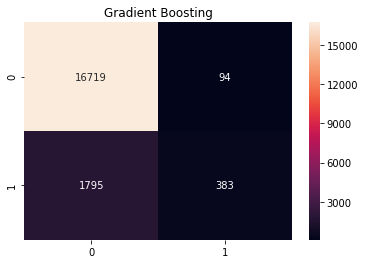

In [26]:
with Timer() as timer:
    from sklearn.ensemble import GradientBoostingClassifier
    gradient_boost = GradientBoostingClassifier()
    #print('Gradient Boosting Classifier:  {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, gradient_boost))))
    grad_ens_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, gradient_boost))
    sns.heatmap(grad_ens_conf_matrix, annot=True,  fmt='');
    title = 'Gradient Boosting'
    plt.title(title);
    print('Gradient Boosting Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, gradient_boost))))
print ('Temps de calcul',timer.interval)

# Support Vector Machine

Support vector machine(SVM):
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     16813
           1       0.86      0.20      0.32      2178

    accuracy                           0.90     18991
   macro avg       0.88      0.60      0.63     18991
weighted avg       0.90      0.90      0.88     18991


Temps de calcul 159.0


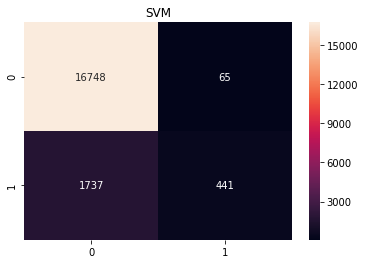

In [27]:
with Timer() as timer:
    from sklearn.svm import SVC
    svc_model = SVC(gamma='auto')
    #print('Support vector machine(SVM):   {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, svc_model))))
    svm_svc_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, svc_model))
    sns.heatmap(svm_svc_conf_matrix, annot=True,  fmt='');
    title = 'SVM'
    plt.title(title);
    print('Support vector machine(SVM):\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, svc_model))))
print ('Temps de calcul',timer.interval)

# Random Forest Classifier

Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     16813
           1       0.70      0.28      0.40      2178

    accuracy                           0.90     18991
   macro avg       0.81      0.63      0.67     18991
weighted avg       0.89      0.90      0.88     18991


Temps de calcul 7.57


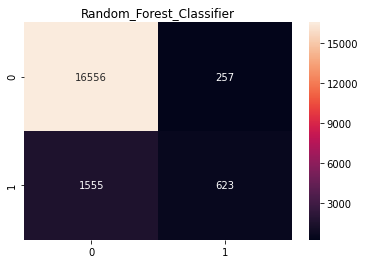

In [28]:
with Timer() as timer:
    from sklearn.ensemble import RandomForestClassifier
    random_forest = RandomForestClassifier(n_estimators=10)
    #print('Random Forest Classifier:      {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, random_forest))))
    Random_Forest_Classifier_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, random_forest))
    sns.heatmap(Random_Forest_Classifier_matrix, annot=True,  fmt='');
    title = 'Random_Forest_Classifier'
    plt.title(title);
    print('Random Forest Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, random_forest))))
print ('Temps de calcul',timer.interval)

# KNeighbors Classifier

K_Neighbor_Classifier:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     16813
           1       0.64      0.32      0.43      2178

    accuracy                           0.90     18991
   macro avg       0.78      0.65      0.69     18991
weighted avg       0.89      0.90      0.89     18991


Temps de calcul 6.6


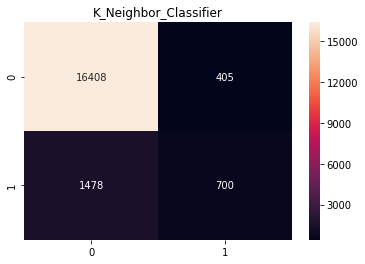

In [29]:
with Timer() as timer:
    from sklearn.neighbors import KNeighborsClassifier
    k_neighbors = KNeighborsClassifier()
    #print('K Nearest Neighbor Classifier: {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, k_neighbors))))
    K_Neighbor_Class_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, k_neighbors))
    sns.heatmap(K_Neighbor_Class_matrix, annot=True,  fmt='');
    title = 'K_Neighbor_Classifier'
    plt.title(title);
    print('K_Neighbor_Classifier:\n {}\n'.format(metrics.classification_report(y, stratified_cv(X, y, k_neighbors))))
print ('Temps de calcul',timer.interval)

# Logistic Regression

Logistic Regression:           0.89
Temps de calcul 0.65


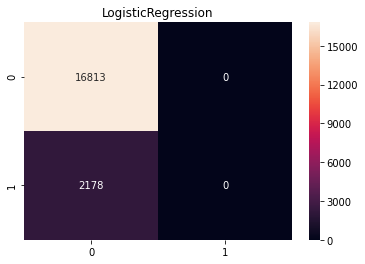

In [30]:
with Timer() as timer:
    from sklearn.linear_model import LogisticRegression
    logistic_regression = LogisticRegression(solver='lbfgs')
    print('Logistic Regression:           {:.2f}'.format(metrics.accuracy_score(y, stratified_cv(X, y, logistic_regression))))
    LogisticRegression_conf_matrix = metrics.confusion_matrix(y, stratified_cv(X, y, logistic_regression))
    sns.heatmap(LogisticRegression_conf_matrix, annot=True,  fmt='');
    title = 'LogisticRegression'
    plt.title(title);
print ('Temps de calcul',timer.interval)

# Final Model Selection

In [31]:
gbc = ensemble.GradientBoostingClassifier()
gbc.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

[0.00979113 0.00318338 0.08111136 0.21822014 0.12467012 0.16168512
 0.2032825  0.19805626]
sexe          0.218220
note          0.203283
dispo         0.198056
specialite    0.161685
diplome       0.124670
salaire       0.081111
age           0.009791
exp           0.003183
dtype: float64


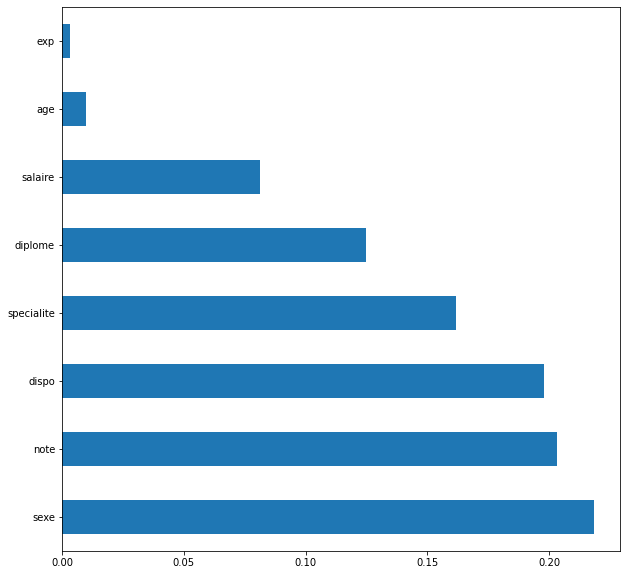

In [32]:
# Get Feature Importance from the classifier
feature_importance = gbc.feature_importances_
print (gbc.feature_importances_)
feat_importances = pd.Series(gbc.feature_importances_, index=df.columns)
feat_importances = feat_importances.nlargest(19)
feat_importances.plot(kind='barh' , figsize=(10,10))
print(feat_importances)